In [2]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

### Table of Contents

* [Data](#Data)
    * [loading data](#section_1_1)
    * [data check](#section_1_2)
* [Exploratory Data Analysis](#EDA)
    * [summary statistics](#section_2_1)
    * [label balance](#section_2_2)
    * [missing data](#section_2_3)
* [Data Prep](#DataPrep)
    * [preprocessing](#section_3_1)
* [Prediction](#Prediction)
    * [model building](#section_4_1)
        * [hyperparameter tuning](#section_4_1_1)
* [Conclusion](#Conclusion)
    * [general comments](#section_5_1)
    * [next steps](#section_5_2)
    

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/c/forest-cover-type-prediction/data](https://www.kaggle.com/c/forest-cover-type-prediction/data)

Information regarding the features for the data are located in the `Data Description` section on the website.

Some code inspiration(especially functions) for this analysis was sourced from [this notebook](https://www.kaggle.com/sharmasanthosh/exploratory-study-on-feature-selection).


#### loading data <a class="anchor" id="section_1_1"></a>

Here the data is being loaded as `train_df`. In Kaggle, the data is split up between `train.csv` and `test.csv`. All the data available for training therefore will be located in `train.csv`, this dataset has the predictor variables and the response variable. The `test.csv` on the other hand is made for submissions and is only used for validating the final model and is unlabeled.  


In [3]:
import warnings

# remove warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd

# read csv
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv('data/test.csv')
test3_df = pd.read_csv('data/test3.csv')

#### data check <a class="anchor" id="section_1_2"></a>

Here the first six rows are explored: there are 15,120 rows and 56 columns. The very last column called `Cover_Type` is the response variable that will be classified.

In [6]:
# rows and columns
print(train_df.shape)

# check first six rows
train_df.head(6)

(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2


In [8]:
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test3_df.head()

,id,fruit,count,drinks,snacks
0,1,apple,2,4,hersheys
1,2,banana,3,3,ice cream
2,3,citrus,4,1,cookies
3,4,apple,3,3,donuts
4,5,durian,5,6,icepop


In [23]:
train_df.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type8                                2
Soil_Type9                      

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette('Set2')
# Set style
sns.set_style('darkgrid')

# set figure size
plt.rcParams['figure.figsize'] = [5, 5]

# show unlimited columns
pd.set_option('display.max_columns', None)

#### summary statistics <a class="anchor" id="section_2_1"></a>

The `describe` function is used to check out the dataset more carefully.
Upon inspection it looks like `Soil_Type7` and `Soil_Type15` are comprised of all zeros and can be removed. Another way of checking the two columns with zeros would be to looks for columns with `std` equal to 0.  

In [11]:
# describe data with summary stats
print(train_df.describe())

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

Now one can look at the distributions for the data. From a personal viewpoint, violin plots are way more powerful than the histogram or the box plot because it shows distributions and facets the data by another variable (in this case the response) to show more dimensions of the data. 

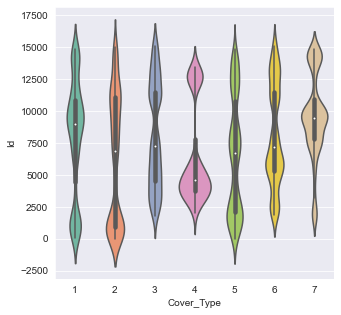

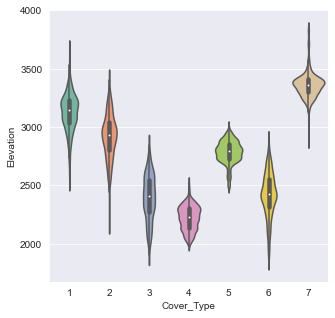

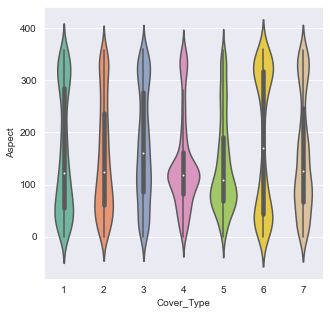

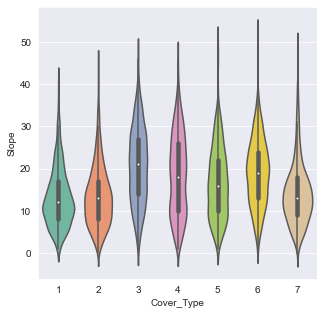

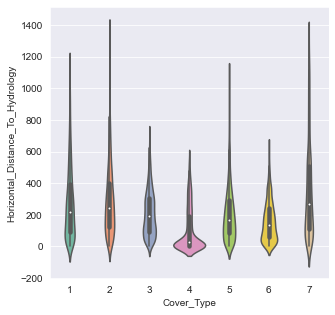

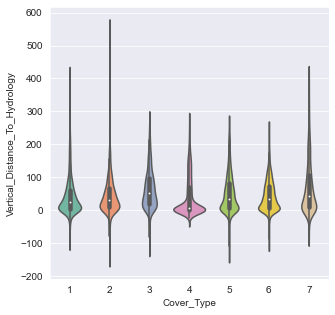

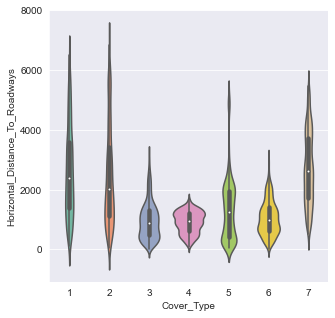

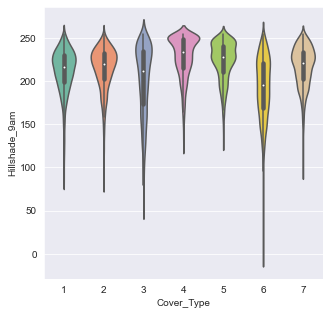

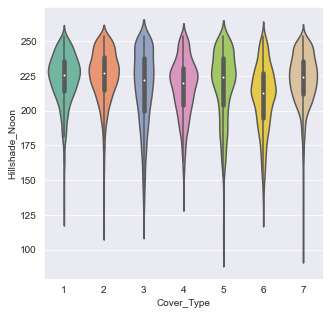

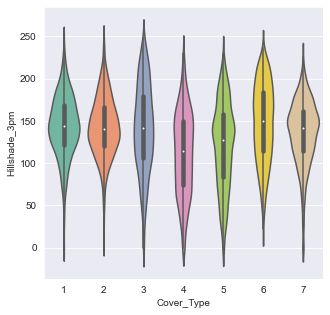

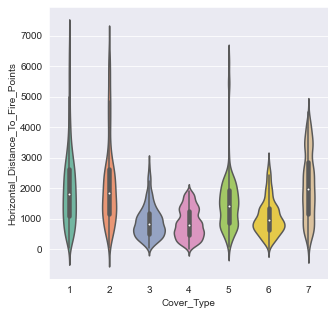

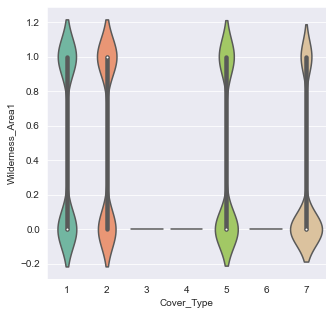

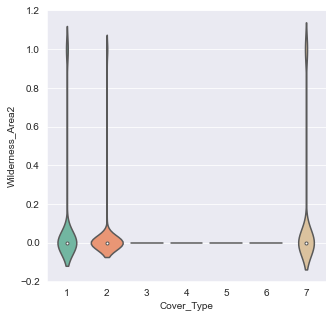

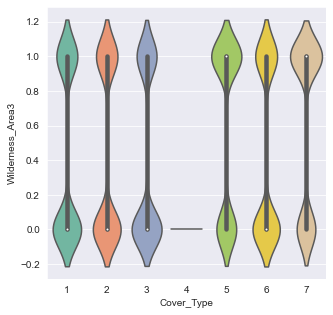

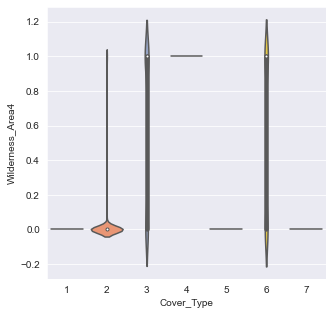

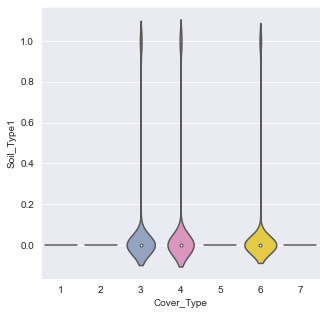

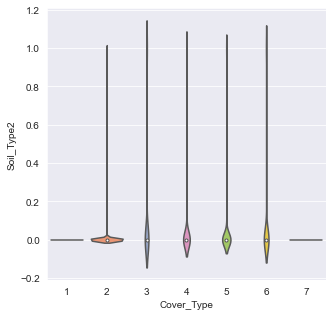

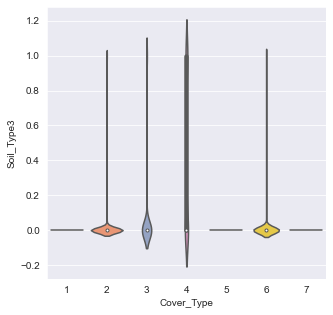

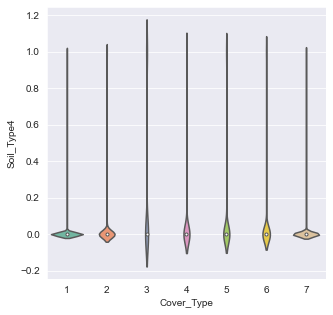

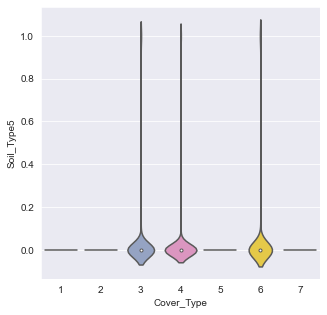

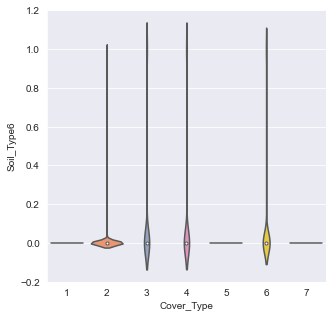

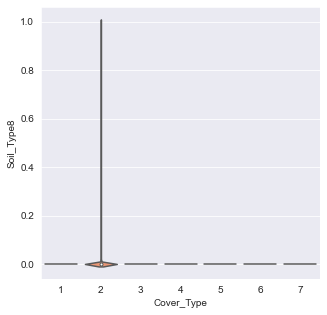

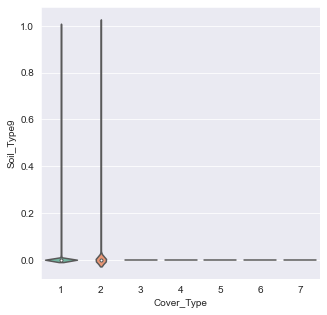

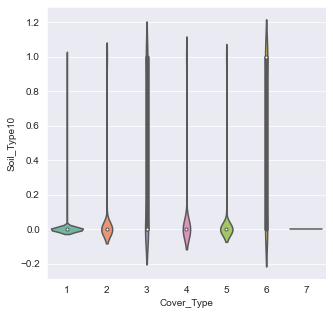

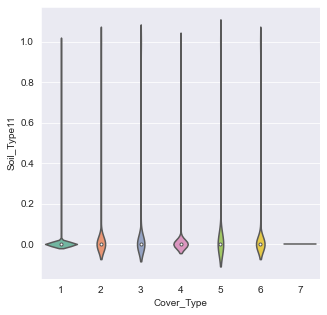

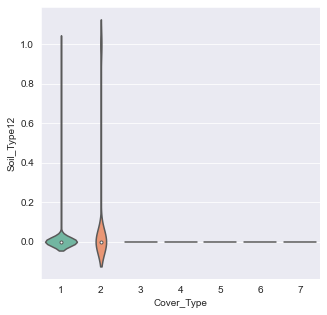

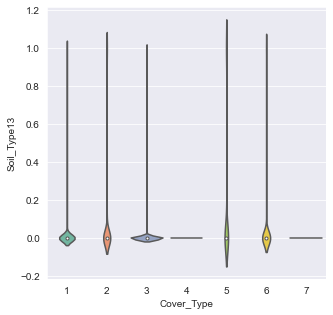

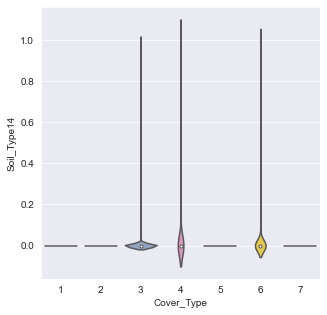

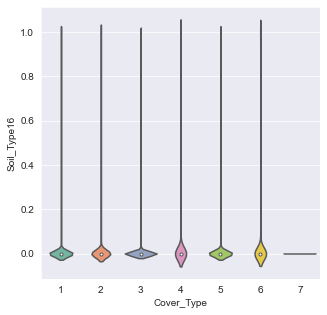

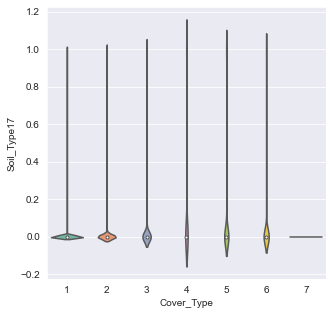

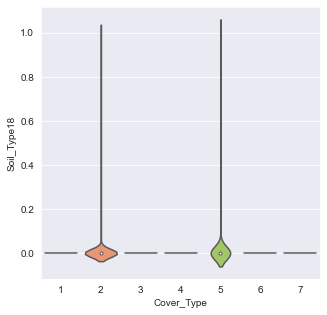

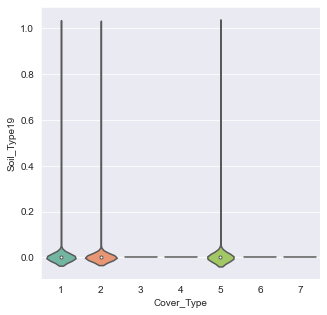

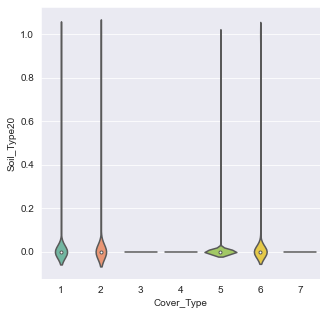

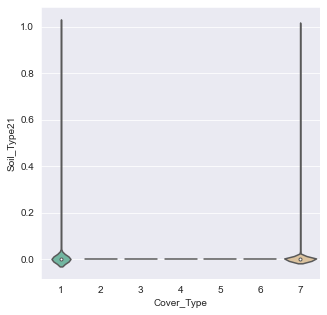

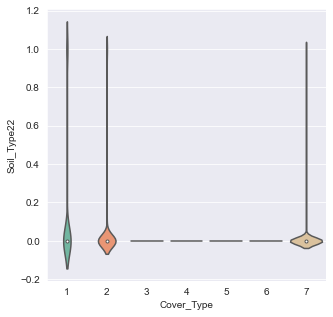

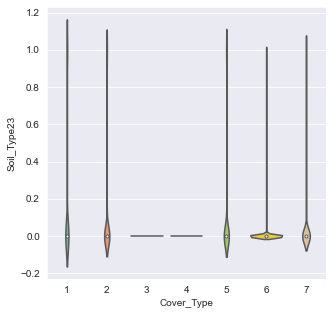

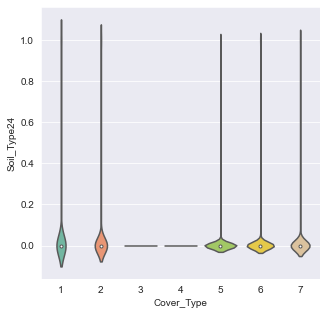

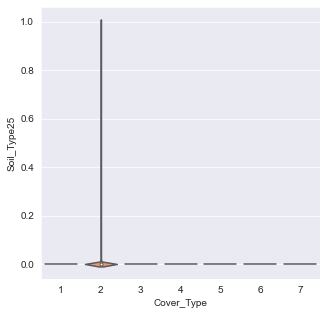

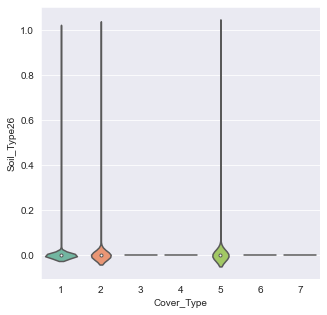

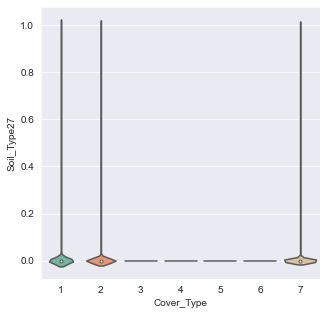

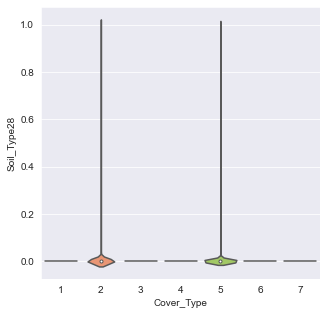

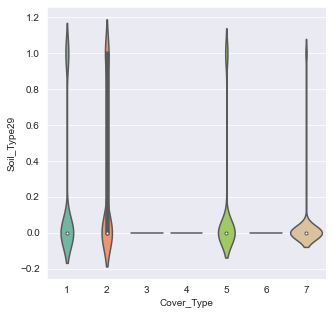

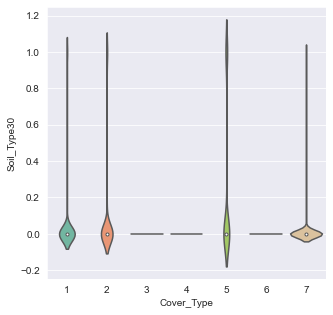

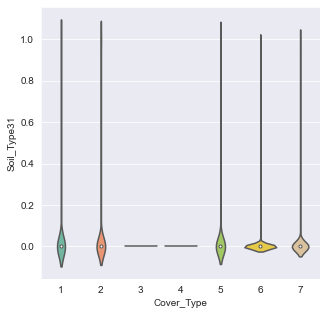

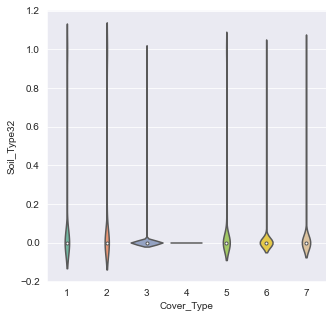

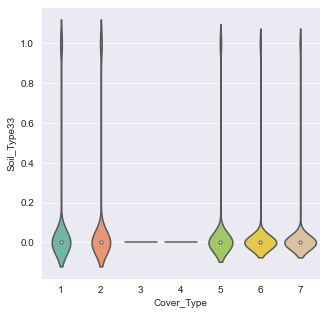

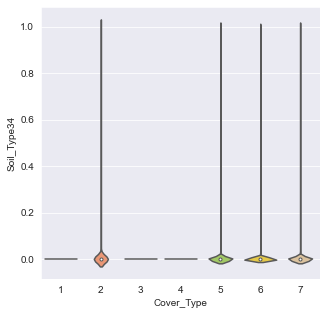

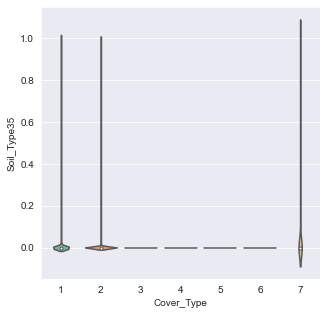

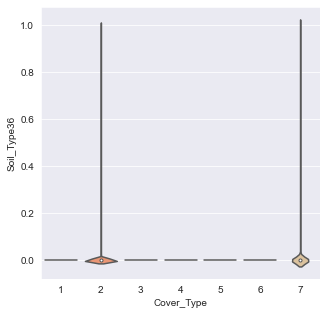

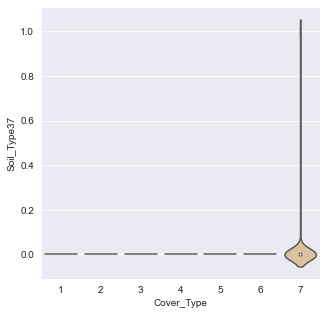

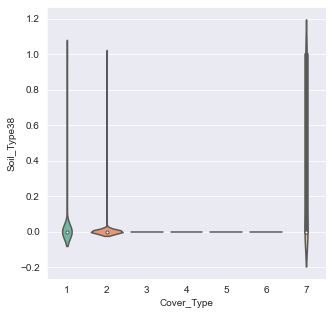

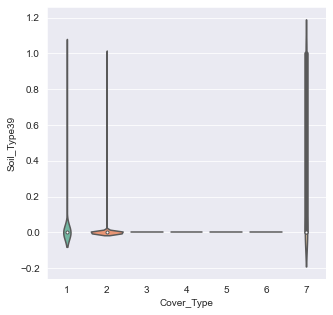

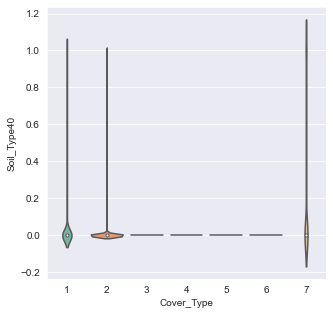

In [19]:
# get columns from train_df
cols = train_df.columns

#number of rows=r , number of columns=c
r, c = train_df.shape

# number of attributes (exclude target)
size = len(cols) - 1

# x-axis has target attribute to distinguish between classes
x = cols[size]

# y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0, size):
    sns.violinplot(data = train_df, x = x, y = y[i]) 
    plt.show()

#### label imbalance <a class="anchor" id="section_2_2"></a>

The next step is to check if there is an imbalance is the response variables. This is also important since it's a multi-class problem where one could have more than two outcomes. If there is a significant difference in the number of observations for each type class, the learning algorithm will exhibit markedly poor performance. 

In [13]:
# check observations by response variable
train_df.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In this case each class has the same number of observations, so the dataset is not imbalanced.

#### missing data <a class="anchor" id="section_2_3"></a>

It is important to check if there are any missing data that might need to be imputed or removed. Luckily the data is pretty clean so no need to worry about that. 

In [14]:
# check number of null values by columns
train_df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


### Data Preperation <a class="anchor" id="DataPrep"></a>



#### preprocessing <a class="anchor" id="section_3_1"></a>

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out," so the data being modeled needs to be clean and ready for both learning and prediction.

First, the columns with standard deviation of 0 will be dropped. Removing unnecessary columns reduces complexity and adheres to the Occam's Razor principle. 

In [12]:
# columns with std = 0    
rm = train_df.std()[train_df.std() == 0].index.values

# drop the columns 
train_df.drop(rm, axis = 1, inplace = True)

Split data in to train and test

**Note**: The following code will work well given that you have ensured that the class column is the final column in the dataset.

In [15]:
col_length = len(train_df.columns)

#Y is the target column, X has the rest
X = train_df.iloc[:, 0:col_length - 1]
y = train_df.iloc[:, col_length - 1:col_length]

#Validation chunk size
val_size = 0.2

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size, 
                                                  random_state = seed)

All the categorical variables in the input dataset are in numerical form. Hence, one does not need to think about one-hot encoding them.

Normalizing the dataset with the `StandardScaler`. It's often a good idea to normalize data. A common way to do so is by standardization. Standardization will set the mean to 0 with a unit standard deviation (standard deviation equal to 1).

In [21]:
#Import libraries for data transformations
from sklearn.preprocessing import StandardScaler

#All features
X_all = []

#Add this version of X to the list 
X_all.append(['Orig', 'All', X_train, X_val, 1.0, cols[:col_length - 1]])

#point where categorical data begins
size = 10

print(X_all[0:5])

[['Orig', 'All',           Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
7366    7367       3367     294      9                               295   
4936    4937       2221     110     26                                90   
5777    5778       3372     265      6                                30   
10724  10725       2555     121     10                                 0   
9412    9413       3428       3     19                               636   
...      ...        ...     ...    ...                               ...   
13123  13124       2391      72     10                                 0   
3264    3265       2136      39     28                                30   
9845    9846       3515     158     27                               120   
10799  10800       2575      80     35                                85   
2732    2733       2738     304      9                                 0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways

Here the program will run through the standard scaling and save the outputs in to `X_all`. It's important to only run the scaler for non-categorical columns. For example, data like elevation and other numeric data should be scaled. 

In [22]:
#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train.iloc[:, 0:size])
X_val_temp = StandardScaler().fit_transform(X_val.iloc[:, 0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp, X_train.iloc[:, size:]), axis = 1)
X_val_con = np.concatenate((X_val_temp, X_val.iloc[:, size:]), axis = 1)
#Add this version of X to the list 
X_all.append(['StdSca', 'All', X_con, X_val_con, 1.0, cols[:col_length - 1]])


### Prediction <a class="anchor" id="Prediction"></a>


#### model building <a class="anchor" id="section_4_1"></a>


Now to create some models. Here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. This solution use all of them, but just four of them for now. 

The next step is to load all of the models and create a list called `models` to add the different ones the solution code will be using.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

Now `cross_val_score` from `model_selection` will be used to test `accuracy` as a measure for each model. There are only two data sets to input (the original and standardized) through each model in this for loop. 

Below it can be seen that `KNN` with the original data did the best with `CART` or decision tree with the original data in second place. 

In [24]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 5
for trans, name, X, X_val, v, cols_list in X_all:
    for modName, model in models:
        kfold = model_selection.KFold(n_splits = 5, shuffle = True, random_state = seed)
        cv_results = model_selection.cross_val_score(model, X, y_train, cv = kfold, 
                                                     scoring = scoring)
        results.append((modName + trans, cv_results))
        names.append(modName + trans)
        msg = "%s: %f (%f)" % (modName + trans, cv_results.mean(), cv_results.std())
        print(msg)


LROrig: 0.385996 (0.008115)
LDAOrig: 0.645999 (0.002813)
KNNOrig: 0.800429 (0.007801)
CARTOrig: 0.777035 (0.010694)
LRStdSca: 0.596147 (0.004993)
LDAStdSca: 0.645999 (0.002813)
KNNStdSca: 0.333829 (0.005778)
CARTStdSca: 0.778771 (0.011740)


In [30]:
# Predicting the test set
results = []
scoring = 'accuracy'
seed = 5
print(models)
for test in test_df:
    for modName, model in models:
        results.append(model.predict(test_df))
# for trans, name, X, X_val, v, cols_list in test_df:
#     for modName, model in models:
#         kfold = model_selection.KFold(n_splits = 5, shuffle = True, random_state = seed)
#         cv_results = model_selection.cross_val_score(model, X, y_train, cv = kfold, 
#                                                      scoring = scoring)
#         results.append((modName + trans, cv_results))
#         names.append(modName + trans)
#         msg = "%s: %f (%f)" % (modName + trans, cv_results.mean(), cv_results.std())
#         print(msg)

[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier())]


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

##### hyperparameter tuning <a class="anchor" id="section_4_1_1"></a>

From the default settings for the models, it was checked if some minor improvements could be obtained. The `CART` algorithm was selected since it had some hyperparameters that could be changed. Here is the description collected about the `criterion` and `splitter` arguments. 

Tune decision tree

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


In [21]:
kfold = model_selection.KFold(n_splits = 5, shuffle = True, random_state = seed)
cv_results = model_selection.cross_val_score(DecisionTreeClassifier(criterion = 'entropy', 
                                                                    splitter = 'random'),
                                             X_all[0][2], y_train, cv = kfold, 
                                             scoring = 'accuracy')

One can see that using `entropy` instead of `gini` and `random` instead of `best` in the `DecisionTreeClassifier` the solution was able to achieve modest gains. While it's difficult to say if this model will generalize well for the validation set in Kaggle, the cross validation does give hope.

In [22]:
cv_results
cv_results.mean()

0.7869541406017786

### Conclusion <a class="anchor" id="Conclusion"></a>



#### general comments <a class="anchor" id="section_5_1"></a>

In this project, the following was accomplished: take data from Kaggle, explore the dataset, preprocess attributes, make and compare various multi-class models. In this case, highly non-linear models like decision trees and KNN seemed to be the best performing and these methods seemed to do better with non-transformed variables.


#### next steps <a class="anchor" id="section_5_2"></a>

Next steps will be to submit the models results on the `test.csv` to the Kaggle website and check the results. If the results don’t look great, one can experiment with different models, different hyperparameters, etc. Furthermore, one can study the input data well, analyze the features and correlations, and explore ways to do feature-extraction and feature-engineering. It often takes steps like these to develop a successful model.